In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
telecom_data=pd.read_excel("telcom_data.xlsx")

In [243]:
telecom_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


#### Task 3 Experience Analytics

In [4]:
experience_metrics = telecom_data.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'sum',
    'TCP UL Retrans. Vol (Bytes)': 'sum',
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    'Handset Type': lambda x: x.mode().iloc[0],
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).reset_index()

In [204]:
experience_metrics.columns

Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'],
      dtype='object')

##### Identifying Null Values

In [5]:
experience_metrics.isnull().sum()

MSISDN/Number                      0
TCP DL Retrans. Vol (Bytes)        0
TCP UL Retrans. Vol (Bytes)        0
Avg RTT DL (ms)                18536
Avg RTT UL (ms)                18523
Handset Type                       0
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

##### Aggregate Columns

In [15]:
experience_metrics['TCP_total'] = experience_metrics['TCP DL Retrans. Vol (Bytes)'] + experience_metrics['TCP UL Retrans. Vol (Bytes)']
experience_metrics['Avg_RTT_total']= experience_metrics['Avg RTT DL (ms)'] + experience_metrics['Avg RTT UL (ms)']
experience_metrics['Avg_Bearer_total'] = experience_metrics['Avg Bearer TP DL (kbps)'] + experience_metrics['Avg Bearer TP UL (kbps)']



print(experience_metrics['TCP_total'])
print(experience_metrics['Avg_RTT_total'])
print(experience_metrics['Avg_Bearer_total'])


0               0.0
1               0.0
2               0.0
3            1066.0
4         9370832.0
            ...    
106851     218045.0
106852          0.0
106853          0.0
106854          0.0
106855          0.0
Name: TCP_total, Length: 106856, dtype: float64
0         46.0
1         31.0
2          NaN
3         84.0
4         59.5
          ... 
106851    52.0
106852    40.0
106853     NaN
106854     NaN
106855     NaN
Name: Avg_RTT_total, Length: 106856, dtype: float64
0            76.0
1            99.0
2            97.0
3           248.0
4         28422.0
           ...   
106851    10365.0
106852      116.0
106853        1.0
106854       33.0
106855        2.0
Name: Avg_Bearer_total, Length: 106856, dtype: float64


##### Handling Null Values

In [19]:
experience_metrics.fillna(experience_metrics.mean(), inplace=True)

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_63238/433433013.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  experience_metrics.fillna(experience_metrics.mean(), inplace=True)


In [20]:
experience_metrics.isnull().sum()

MSISDN/Number                  0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
Handset Type                   0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
TCP_total                      0
Avg_RTT_total                  0
Avg_Bearer_total               0
dtype: int64

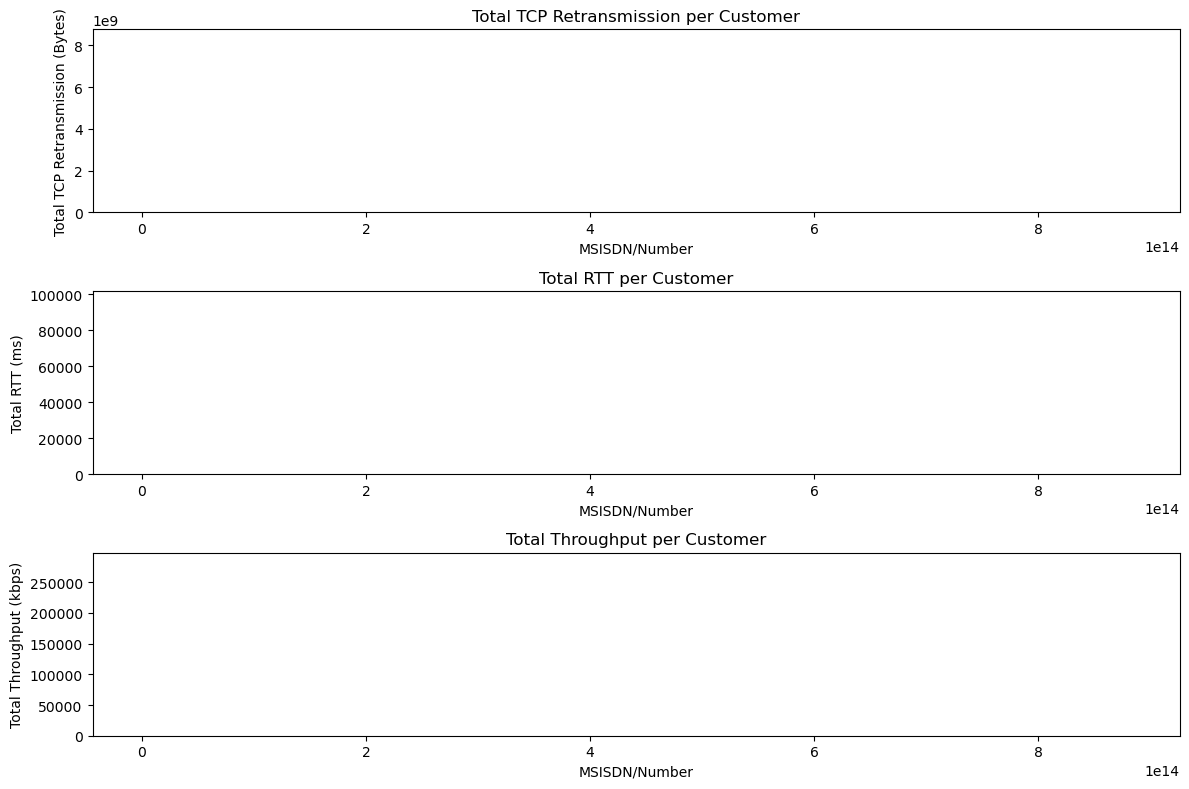

In [21]:
plt.figure(figsize=(12, 8))

# Plotting TCP_total
plt.subplot(3, 1, 1)
plt.bar(experience_metrics['MSISDN/Number'], experience_metrics['TCP_total'], color='skyblue')
plt.title('Total TCP Retransmission per Customer')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total TCP Retransmission (Bytes)')

# Plotting Avg_RTT_total
plt.subplot(3, 1, 2)
plt.bar(experience_metrics['MSISDN/Number'], experience_metrics['Avg_RTT_total'], color='lightcoral')
plt.title('Total RTT per Customer')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total RTT (ms)')

# Plotting Avg_Bearer_total
plt.subplot(3, 1, 3)
plt.bar(experience_metrics['MSISDN/Number'], experience_metrics['Avg_Bearer_total'], color='lightgreen')
plt.title('Total Throughput per Customer')
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Throughput (kbps)')

plt.tight_layout()
plt.show()

#### Computation and listing Top/ Bottom/ Most frequent values

### Top 10 

In [210]:
from tabulate import tabulate


top_10_tcp = experience_metrics['TCP_total'].nlargest(10)
result_table = pd.DataFrame({'MSISDN': top_10_tcp.index, 'Top 10 TCP': top_10_tcp.values})

# Display the result in a tabular format
table_format = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)

print(table_format)

+---------+--------------+
| MSISDN  |  Top 10 TCP  |
+---------+--------------+
| 66860.0 | 8354209105.0 |
| 34123.0 | 7941860302.0 |
| 42366.0 | 7374139060.0 |
| 94681.0 | 6043978448.0 |
| 98213.0 | 5879989037.0 |
| 25774.0 | 5593366107.0 |
| 51638.0 | 5566928580.0 |
| 99929.0 | 5179458974.0 |
| 70913.0 | 5174214964.0 |
| 31965.0 | 5165856986.0 |
+---------+--------------+


##### Interpretation and Conclusion

* The table displays the top 10 users based on their total TCP traffic, with the corresponding MSISDN (Mobile Subscriber Integrated Services Digital Network) and TCP total values.
* The user with MSISDN 66860.0 has the highest total TCP traffic among the top 10, indicating substantial data transmission using TCP protocols.
* Users in the top 10 have significant TCP traffic, suggesting active data communication, potentially involving activities such as file transfers, web browsing, or application data exchange.
* Telecom providers need to ensure sufficient network resources to accommodate users with high TCP traffic, as this indicates active and potentially resource-intensive data communication.
* Understanding the TCP traffic patterns can provide insights into user behavior, helping providers optimize their services for specific communication needs.
* Telecom companies may use this information to tailor services or promotions for users engaged in high TCP traffic activities. i.e,like offering data plans optimized for heavy data transmission could enhance user satisfaction.


In [211]:
top_10_avg_rtt = experience_metrics['Avg_RTT_total'].nlargest(10)
result_table = pd.DataFrame({'MSISDN': top_10_tcp.index, 'Top 10 Avg RTT': top_10_avg_rtt.values})

# Display the result in a tabular format
table_format = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)

print(table_format)

+---------+----------------+
| MSISDN  | Top 10 Avg RTT |
+---------+----------------+
| 66860.0 |    96924.0     |
| 34123.0 |    54848.0     |
| 42366.0 |    32335.0     |
| 94681.0 |    27278.0     |
| 98213.0 |    26300.0     |
| 25774.0 |    25715.0     |
| 51638.0 |    25388.0     |
| 99929.0 |    24738.0     |
| 70913.0 |    23010.5     |
| 31965.0 |    20980.0     |
+---------+----------------+


##### Interpretation and Conclusion

* The table lists the top 10 users with the highest average round-trip time (Avg RTT), indicating delays in data transmission.
* Avg RTT measures the time it takes for data to travel from source to destination and back. Higher values suggest potential network latency or delays.
* Users with high Avg RTT may experience delays in real-time applications like gaming or video conferencing, affecting their overall network experience.
* Telecom providers should focus on optimizing the network for users with high Avg RTT to enhance service quality.
* Addressing latency issues can lead to improved user satisfaction and overall network performance.
* Regular monitoring of Avg RTT and proactive adjustments to network configurations are essential for maintaining a responsive network.

In [212]:
top_10_avg_bearer = experience_metrics['Avg_Bearer_total'].nlargest(10)
result_table = pd.DataFrame({'MSISDN': top_10_tcp.index, 'Top 10 Avg Bearer': top_10_avg_bearer.values})

# Display the result in a tabular format
table_format = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)

print(table_format)

+---------+-------------------+
| MSISDN  | Top 10 Avg Bearer |
+---------+-------------------+
| 66860.0 |     283931.0      |
| 34123.0 |     265724.0      |
| 42366.0 |     265176.5      |
| 94681.0 |     254950.0      |
| 98213.0 |     238982.0      |
| 25774.0 |     235365.0      |
| 51638.0 |     230982.0      |
| 99929.0 |     228303.0      |
| 70913.0 |     227334.0      |
| 31965.0 |     226505.0      |
+---------+-------------------+


##### Interpretation and Conclusion

* The table lists the top 10 users with the highest average bearer throughput, representing the mean average data transfer speed.
* Avg Bearer Throughput measures the average data transfer speed for users, indicating how fast data is transmitted over the network.
* User with MSISDN 66860.0 has the highest average bearer throughput among the top 10, suggesting they experience faster data transfer speeds.
* Users with higher Avg Bearer Throughput generally enjoy faster and smoother data connectivity, enhancing their overall network experience.
* Telecom providers can use this information to understand the network performance for top users and optimize services accordingly.
* Addressing factors that contribute to high Avg Bearer Throughput can lead to improved user satisfaction and loyalty.
* Regular monitoring of Avg Bearer Throughput is essential for providers to maintain a high-quality network and address any potential performance issues.


## Bottom 10 

In [213]:

bottom_10_tcp = experience_metrics['TCP_total'].nsmallest(10)
result_table = pd.DataFrame({'MSISDN': bottom_10_tcp.index, 'Bottom 10 TCP': bottom_10_tcp.values})

# Display the result in a tabular format
table_format = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)

print(table_format)

+--------+---------------+
| MSISDN | Bottom 10 TCP |
+--------+---------------+
|  0.0   |      0.0      |
|  1.0   |      0.0      |
|  2.0   |      0.0      |
|  8.0   |      0.0      |
|  10.0  |      0.0      |
|  12.0  |      0.0      |
|  13.0  |      0.0      |
|  14.0  |      0.0      |
|  16.0  |      0.0      |
|  18.0  |      0.0      |
+--------+---------------+


##### Interpretation and Conclusion

* The table shows the bottom 10 users with the smallest total TCP traffic, all of which have a TCP total value of 0.0.
* Users in the bottom 10 have minimal or no TCP traffic, suggesting low or no engagement in TCP-dependent activities such as file transfers, web browsing, or application data exchange.
* Telecom providers may not need to allocate significant network resources for these users, as their TCP traffic is negligible.
* It's essential to understand the context behind the lack of TCP traffic for these users. It could be due to infrequent network usage, device issues, or other factors.
* Continuous monitoring of users with minimal TCP traffic is necessary to adapt to changing user behaviors and optimize network resources effectively.

In [214]:
bottom_10_avg_rtt = experience_metrics['Avg_RTT_total'].nsmallest(10)
result_table = pd.DataFrame({'MSISDN': bottom_10_avg_rtt.index, 'Bottom 10 Avg RTT': bottom_10_avg_rtt.values})

# Display the result in a tabular format
table_format = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)

print(table_format)

+---------+-------------------+
| MSISDN  | Bottom 10 Avg RTT |
+---------+-------------------+
| 28878.0 |        0.0        |
| 44748.0 |        0.0        |
| 39066.0 |        2.0        |
| 83396.0 |        4.0        |
| 36039.0 |        5.0        |
| 69662.0 |        6.0        |
| 21980.0 |        8.0        |
| 3882.0  |        9.0        |
| 74434.0 |        9.0        |
| 17863.0 |       10.0        |
+---------+-------------------+


##### Interpretation and Conclusion

* The table displays the bottom 10 users with the smallest average round-trip time (Avg RTT), where the majority have very low or zero Avg RTT values.
* Users in the bottom 10 have minimal or no latency in their data transmission, indicating quick and responsive network connections.
* Low Avg RTT values are generally favorable, suggesting that these users experience minimal delays in data travel time.
* The user with MSISDN 28878.0 has an Avg RTT of 0.0, indicating an immediate and efficient data transmission experience.
* Telecom providers may acknowledge these users as having optimal network performance, leading to enhanced user satisfaction.
* It's essential to investigate the factors contributing to such low Avg RTT values and ensure they align with positive user experiences.
* Continuous monitoring is crucial to identify any changes in Avg RTT patterns and maintain a consistently responsive network.

In [245]:
bottom_10_avg_bearer = aggregate_data['Avg_Bearer_total'].nsmallest(10)
result_table = pd.DataFrame({'MSISDN': bottom_10_avg_bearer.index, 'Bottom 10 Avg Bearer': bottom_10_avg_bearer.values})

# Display the result in a tabular format
table_format = tabulate(result_table, headers='keys', tablefmt='pretty', showindex=False)

print(table_format)

+--------+----------------------+
| MSISDN | Bottom 10 Avg Bearer |
+--------+----------------------+
| 857.0  |         0.0          |
| 1204.0 |         0.0          |
| 2473.0 |         0.0          |
| 2605.0 |         0.0          |
| 2671.0 |         0.0          |
| 3238.0 |         0.0          |
| 3738.0 |         0.0          |
| 4276.0 |         0.0          |
| 7196.0 |         0.0          |
| 7518.0 |         0.0          |
+--------+----------------------+


##### Interpretation and Conclusion

* The table presents the bottom 10 users with the smallest average bearer throughput, where all users have an Avg Bearer value of 0.0.
* Users in the bottom 10 experience minimal or no data transfer speed, suggesting very low engagement or potential connectivity issues.
* These users may not be actively utilizing data services, and the network resources allocated to them may be re-evaluated for optimization.
* The Avg Bearer Throughput of 0.0 indicates a lack of data transmission, which could be due to inactive devices, network disconnections, or other factors.
* Telecom providers may consider investigating the reasons behind the absence of Avg Bearer Throughput for these users and take appropriate actions.
* Continuous monitoring is essential to identify changes in user behavior and address any potential network connectivity issues promptly.

### Most Frequent

In [215]:
most_frequent_tcp = experience_metrics['TCP_total'].mode().tolist()
most_frequent_tcp

[0.0]

##### Interpretation & Conclusion

 The most frequent value in the 'TCP_total' column of the experience_metrics dataset is 0.0. This suggests that a considerable number of users may have minimal or no TCP traffic, indicating that a significant portion of the user base is not actively engaged in TCP-dependent activities such as file transfers, web browsing, or application data exchange. Understanding the prevalence of zero TCP traffic can be valuable for telecom providers in resource allocation and network optimization strategies.

In [216]:
most_frequent_Avg_RTT = experience_metrics['Avg_RTT_total'].mode().tolist()
most_frequent_Avg_RTT

[135.95399846187928]

##### Interpretation & Conclusion

The most frequent value in the 'Avg_RTT_total' column of the experience_metrics dataset is approximately 135.95 milliseconds. This suggests that a significant number of users experience an average round-trip time around this value, indicating the typical latency or delay in data transmission for this user group. Understanding the most frequent Avg RTT value is crucial for assessing the common network latency experienced by users, and it can be used to optimize network performance and enhance user experiences.

In [217]:
most_frequent_Avg_Bearer = experience_metrics['Avg_Bearer_total'].mode().tolist()
most_frequent_Avg_Bearer

[15.0]

##### Interpretation & Conclusion

The most frequent value in the 'Avg_Bearer_total' column of the experience_metrics dataset is 15.0. This suggests that a significant number of users have an average bearer throughput of 15.0, representing the mean average data transfer speed for this user group. Understanding the most frequent Avg Bearer value is important for assessing the common data transfer speed experienced by users, and it can be utilized by telecom providers to optimize network resources and enhance overall user satisfaction.

##### Top 10 Most Frequent

In [218]:
most_frequent_tcp = experience_metrics['TCP_total'].value_counts().nlargest(10)

most_frequent_tcp_table = pd.DataFrame({
    
    'TCP_total': most_frequent_tcp.index,
    'Frequency': most_frequent_tcp.values.astype(int)
})


table_format = tabulate(most_frequent_tcp_table, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+-----------+-----------+
| TCP_total | Frequency |
+-----------+-----------+
|    0.0    |  55974.0  |
|  1294.0   |   469.0   |
|  1330.0   |   421.0   |
|  2660.0   |   214.0   |
|  1318.0   |   187.0   |
|   38.0    |   129.0   |
|  3990.0   |   126.0   |
|   92.0    |   119.0   |
|  5320.0   |   97.0    |
|  2636.0   |   93.0    |
+-----------+-----------+


##### Interpretation and Conclusion

* The most frequent value in the 'TCP_total' column is 0.0, indicating a significant number of users with minimal or no TCP traffic.

* Users with 0.0 TCP_total may have inactive or infrequently used devices, leading to limited engagement in TCP-dependent activities.

* Telecom providers should consider optimizing network resources for users with minimal TCP engagement, as allocating significant resources for these users may not be necessary.

* The distribution of TCP_total values provides insights into common patterns of user behavior, helping tailor services to user preferences.

* The findings suggest an opportunity for telecom providers to refine service offerings and enhance the overall quality of service for their user base.

* Ongoing monitoring is essential for staying responsive to changing user needs and maintaining an efficient network.

In [219]:
most_frequent_avg_rtt = experience_metrics['Avg_RTT_total'].value_counts().nlargest(10)

most_frequent_avg_rtt_table = pd.DataFrame({
    
    'Avg_RTT_total': most_frequent_avg_rtt.index,
    'Frequency': most_frequent_avg_rtt.values
})


table_format = tabulate(most_frequent_avg_rtt_table, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+--------------------+-----------+
|   Avg_RTT_total    | Frequency |
+--------------------+-----------+
| 135.95399846187928 |  18515.0  |
|        29.0        |  2999.0   |
|        39.0        |  2458.0   |
|        38.0        |  1745.0   |
|        40.0        |  1670.0   |
|        30.0        |  1647.0   |
|        28.0        |  1502.0   |
|        49.0        |  1388.0   |
|        41.0        |  1290.0   |
|        31.0        |  1242.0   |
+--------------------+-----------+


##### Interpretation & Conclusion

* The most frequent value in the 'Avg_RTT_total' column is approximately 135.95 milliseconds, with a substantial frequency of 18,515.

* This indicates that a significant number of users experience an average round-trip time around 135.95 milliseconds, reflecting the typical latency or delay in data transmission for this user group.

* The distribution of Avg_RTT_total values provides insights into common patterns of network latency experienced by users.

* Understanding the most frequent Avg RTT value is crucial for assessing the common network latency experienced by users, and it can be utilized to optimize network performance and enhance user experiences.

* Telecom providers can use this information to optimize network resources and address latency-related issues, ensuring a consistent and satisfactory user experience.

In [220]:
most_frequent_avg_bearer = experience_metrics['Avg_Bearer_total'].value_counts().nlargest(10)

most_frequent_avg_bearer_table = pd.DataFrame({
    
    'Avg_Bearer_total': most_frequent_avg_bearer.index,
    'Frequency': most_frequent_avg_bearer.values
})


table_format = tabulate(most_frequent_avg_bearer_table, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+------------------+-----------+
| Avg_Bearer_total | Frequency |
+------------------+-----------+
|       15.0       |  2872.0   |
|       63.0       |  2138.0   |
|       97.0       |  1094.0   |
|       90.0       |  1062.0   |
|       98.0       |  1025.0   |
|       96.0       |   938.0   |
|       99.0       |   918.0   |
|       89.0       |   881.0   |
|       91.0       |   864.0   |
|       95.0       |   856.0   |
+------------------+-----------+


##### Interpretation & Conclusion

* The most frequent value in the 'Avg_Bearer_total' column is 15.0, with a notable frequency of 2,872.

* This indicates that a substantial number of users experience an average bearer throughput around 15.0, representing the mean average data transfer speed for this user group.

* Understanding the most frequent Avg Bearer value is crucial for assessing the common data transfer speed experienced by users, and it can be utilized by telecom providers to optimize network resources and enhance overall user satisfaction.

* The distribution of Avg_Bearer_total values provides insights into common patterns of data transfer speed, allowing providers to tailor services to user preferences.

* Telecom providers can use this information to refine service offerings, optimize network resources, and maintain a high-quality network for their user base.


In [221]:
most_frequent_tcp = experience_metrics['TCP_total'].value_counts().nlargest(10)

# Create a DataFrame with the 'TCP_total' and 'Frequency' columns
most_frequent_tcp_table = pd.DataFrame({
    'TCP_total': most_frequent_tcp.index,
    'Frequency': most_frequent_tcp.values
})

# Merge with the original DataFrame to include 'MSISDN/Number'
most_frequent_tcp_table = most_frequent_tcp_table.merge(experience_metrics[['MSISDN/Number', 'TCP_total']], left_on='TCP_total', right_on='TCP_total', how='left')

# Drop duplicate rows based on 'TCP_total'
most_frequent_tcp_table = most_frequent_tcp_table.drop_duplicates(subset='TCP_total')

# Display the table
print(most_frequent_tcp_table)

       TCP_total  Frequency  MSISDN/Number
0            0.0      55974   3.360100e+10
55974     1294.0        469   3.360102e+10
56443     1330.0        421   3.360105e+10
56864     2660.0        214   3.360336e+10
57078     1318.0        187   3.360419e+10
57265       38.0        129   3.360302e+10
57394     3990.0        126   3.360347e+10
57520       92.0        119   3.360758e+10
57639     5320.0         97   3.360227e+10
57736     2636.0         93   3.361033e+10


##### Interpretation & Conclusion

* The most frequent value in the 'TCP_total' column is 0.0, with a high frequency of 55,974. This suggests that a significant number of users have minimal or no TCP traffic.

* The table includes the MSISDN/Number associated with each most frequent TCP_total value, providing insights into specific users with these patterns.

* Users with these most frequent TCP_total values may exhibit common behavior in terms of TCP traffic, enabling targeted analysis or service improvements for these user segments.

#### Compute and report distribution

In [222]:
experience_metrics.columns

Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP_total', 'Avg_RTT_total', 'Avg_Bearer_total'],
      dtype='object')

##### Distribution of the Average throughput per handset type

In [223]:

avg_throughput_per_type = experience_metrics.groupby('Handset Type')['Avg_Bearer_total'].mean().round(2).sort_values(ascending=False).head(10)
avg_throughput_per_type = avg_throughput_per_type.reset_index(name='Avg Bearer TP')


table_format = tabulate(avg_throughput_per_type, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)


+-----------------------------+---------------+
|        Handset Type         | Avg Bearer TP |
+-----------------------------+---------------+
|      Huawei B715S-23C       |   109866.8    |
|   New-Bund Technol. Mix 2   |   105211.0    |
|           Lg G6+            |   100135.0    |
|  Zyxel Communicat. Sbg3600  |    97351.0    |
|       Huawei Y9 2019        |    91739.0    |
| Xiaomi Communica. M1902F1G  |   85613.67    |
| Spa Condor Elect. Allure M2 |    84311.5    |
|   Ovvi-Cellphone T. Echo    |    78953.0    |
|         Huawei Pele         |    78381.0    |
| Spa Condor Elect. Plume L2  |    76529.0    |
+-----------------------------+---------------+


##### Interpretation & Conclusion

* The table displays the top 10 Handset Types based on their average bearer throughput (Avg Bearer TP).

* The 'Huawei B715S-23C' handset type has the highest average bearer throughput, reaching 109,866.8.

* 'New-Bund Technol. Mix 2' and 'Lg G6+' are also among the top-performing handsets in terms of average bearer throughput.

* Analyzing average throughput per handset type is valuable for understanding the performance of different devices on the network.

* Telecom providers can use this information to identify popular handsets with high average throughput and ensure optimal network support for these devices.

##### Average TCP retransmission view per handset type

In [224]:

avg_tcp_per_type = experience_metrics.groupby('Handset Type')['TCP_total'].mean().round(2).sort_values(ascending=False).head(10)
avg_tcp_per_type = avg_tcp_per_type.reset_index(name='TCP Total DL & UL')


table_format = tabulate(avg_tcp_per_type, headers='keys', tablefmt='pretty', showindex=False)
print(table_format)

+-------------------------------------------+-------------------+
|               Handset Type                | TCP Total DL & UL |
+-------------------------------------------+-------------------+
|                Lg Lg-H635                 |    904852760.0    |
|              Huawei Bln-Al10              |    329174592.0    |
|    Asustek Asus Zenfone Selfie Zd551Kl    |    321658306.0    |
|      Samsung Galaxy Tab S3 (Sm-T825)      |   253305433.75    |
|             Huawei E5776S-32              |   205644296.75    |
|          Apple iPad Pro (A1652)           |   117028403.83    |
|          Samsung Galaxy J8 2018           |    115758332.0    |
|             Huawei B528S-23A              |    99506195.35    |
| Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9 |    89437559.67    |
|          Sierra Wireless Usb305           |    86649901.0     |
+-------------------------------------------+-------------------+


##### Interpretation & Conclusion

* The table presents the top 10 Handset Types based on their average TCP total (Download and Upload) values.

* 'Lg Lg-H635' is the top-performing handset in terms of average TCP total, reaching 904,852,760.0.

* 'Huawei Bln-Al10' and 'Asustek Asus Zenfone Selfie Zd551Kl' are also among the top-performing handsets in terms of average TCP total.

* Analyzing average TCP total per handset type is crucial for understanding the data transmission efficiency of different devices on the network.

* Telecom providers can utilize this information to optimize network support for popular handsets with high TCP total values.

### K-means Clustering

In [238]:
experience_metrics.columns

Index(['MSISDN/Number', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Handset Type', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP_total', 'Avg_RTT_total', 'Avg_Bearer_total', 'Cluster'],
      dtype='object')

In [227]:
features_for_clustering = ['TCP_total', 'Avg_RTT_total', 'Avg_Bearer_total']

X= experience_metrics[features_for_clustering]

In [228]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [229]:
kmeans = KMeans(n_clusters=3, random_state=42)
experience_metrics['Cluster'] = kmeans.fit_predict(X)
kmeans

/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [230]:
cluster_description=experience_metrics.groupby('Cluster').describe()
print("\nCluster Descriptions:")
print(cluster_description)


Cluster Descriptions:
        MSISDN/Number                                                          \
                count          mean           std           min           25%   
Cluster                                                                         
0            106475.0  4.515564e+10  2.894588e+12  3.360100e+10  3.365086e+10   
1               132.0  3.368296e+10  3.797977e+07  3.365022e+10  3.366131e+10   
2               249.0  3.368553e+10  3.823500e+07  3.363411e+10  3.366138e+10   

                                                  TCP DL Retrans. Vol (Bytes)  \
                  50%           75%           max                       count   
Cluster                                                                         
0        3.366364e+10  3.368341e+10  8.823971e+14                    106475.0   
1        3.366560e+10  3.367193e+10  3.376386e+10                       132.0   
2        3.366593e+10  3.369889e+10  3.376398e+10                       249.0   

   

In [231]:
cluster_description

MSISDN/Number                                                          \
                count          mean           std           min           25%   
Cluster                                                                         
0            106475.0  4.515564e+10  2.894588e+12  3.360100e+10  3.365086e+10   
1               132.0  3.368296e+10  3.797977e+07  3.365022e+10  3.366131e+10   
2               249.0  3.368553e+10  3.823500e+07  3.363411e+10  3.366138e+10   

                                                  TCP DL Retrans. Vol (Bytes)  \
                  50%           75%           max                       count   
Cluster                                                                         
0        3.366364e+10  3.368341e+10  8.823971e+14                    106475.0   
1        3.366560e+10  3.367193e+10  3.376386e+10                       132.0   
2        3.366593e+10  3.369889e+10  3.376398e+10                       249.0   

                       ... Avg_RTT_total           Avg_Bearer_total  \
                 mean  ...           75%       max            count   
Cluster                ...                                            
0        4.378885e+06  ...    135.953998  96924.00         106475.0   
1        3.608387e+09  ...    154.750000    572.00            132.0   
2        1.342527e+09  ...    161.500000    951.75            249.0   

                                                                           \
                 mean           std      min        25%      50%      75%   
Cluster                                                                     
0        12970.798047  22827.081809      0.0     92.000    196.5  18616.0   
1        67357.042298  29396.513261  22336.0  45711.375  62196.0  80664.0   
2        62277.020248  32201.017209   2146.8  39079.000  57093.0  77979.0   

                   
              max  
Cluster            
0        283931.0  
1        172309.5  
2        181839.0  

[3 rows x 80 columns]

##### Interpretation & Conclusion

* The table summarizes key statistics for each cluster, including the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum for various features.

* MSISDN/Number:

Cluster 0 has the largest count, mean, and standard deviation.
Clusters 1 and 2 have smaller counts with relatively similar statistics.

* TCP DL Retrans. Vol (Bytes):

Cluster 0 has the lowest mean, while Clusters 1 and 2 have significantly higher means.
The standard deviation is also higher in Clusters 1 and 2.

* Avg_RTT_total:

Cluster 0 has a lower mean Avg_RTT_total compared to Clusters 1 and 2.
Cluster 2 has the highest mean for Avg_RTT_total.

* Avg_Bearer_total:

Cluster 0 has a lower mean Avg_Bearer_total compared to Clusters 1 and 2.
Cluster 2 has the highest mean for Avg_Bearer_total.

* These statistics provide a detailed overview of the distribution of features within each cluster, aiding in the characterization of user behavior in different segments.

### **Cluster 3D Scatter Plot**

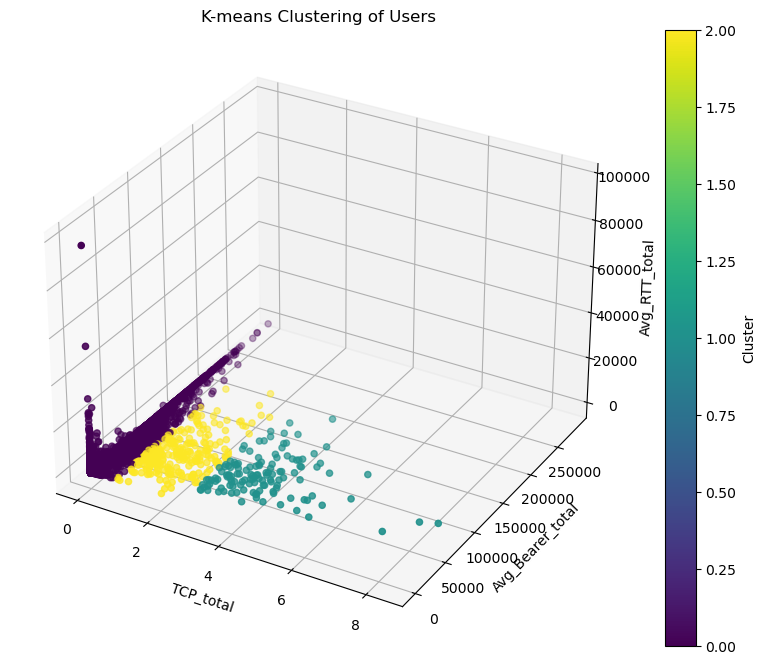

In [241]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    experience_metrics['TCP_total'],
    experience_metrics['Avg_Bearer_total'],
    experience_metrics['Avg_RTT_total'],
    c=experience_metrics['Cluster'],
    cmap='viridis'
)

ax.set_xlabel('TCP_total')
ax.set_ylabel('Avg_Bearer_total')
ax.set_zlabel('Avg_RTT_total')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

plt.title('K-means Clustering of Users')
plt.show()

##### Interpretation & Conclusion

* The plot reveals how users are distributed in the 3D feature space.
* Clusters are differentiated by colors, allowing for visual identification.
* Users with similar characteristics are grouped together in the same cluster.
* Users with different usage patterns and experiences are clearly separated into distinct clusters.
* Clusters can help identify groups of users with similar network behavior, enabling targeted analysis and personalized strategies.
* This visualization enhances the understanding of the segmentation achieved through K-means clustering and provides a comprehensive view of the user distribution in the feature space.

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_23839/393200782.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cluster_avg_values = experience_metrics.groupby('Cluster')['TCP_total', 'Avg_Bearer_total'].mean().reset_index()


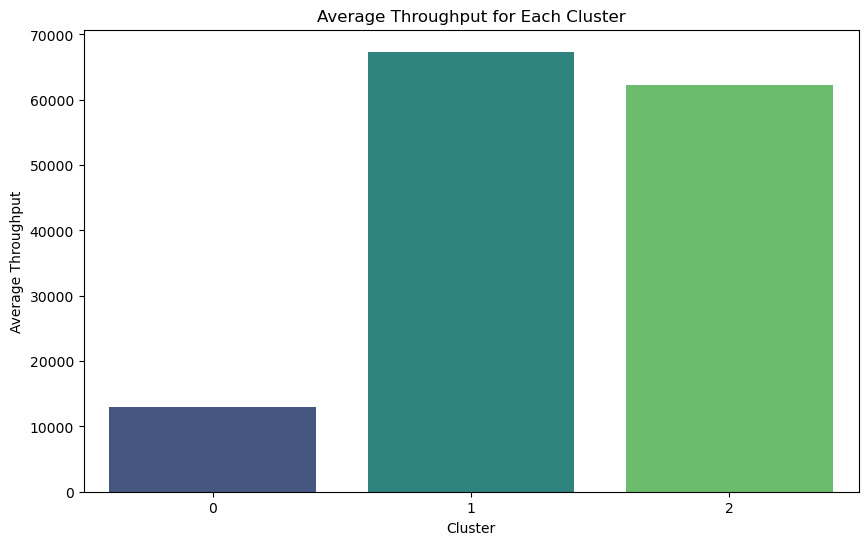

In [233]:
cluster_avg_values = experience_metrics.groupby('Cluster')['TCP_total', 'Avg_Bearer_total'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Avg_Bearer_total', data=cluster_avg_values, palette='viridis')
plt.title('Average Throughput for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Throughput')
plt.show()

##### Interpretation and Conclusion

* Cluster 0 has the lowest average throughput, approximately 15,000 units.
* Cluster 1 exhibits a significantly higher average throughput, approximately 70,000 units.
* Cluster 2 falls in between, with an average throughput around 60,000 units.
* The visualization emphasizes the diversity in user experiences across the clusters.
* Cluster 1 stands out with the highest average throughput, indicating a group of users with more intensive data usage.
* Understanding these throughput differences can guide targeted interventions or improvements tailored to each cluster's needs.
* This visual representation makes it easy to compare the average throughput values across clusters, aiding in the identification of patterns and potential areas for optimization or enhancement.


##### Elbow Method of K Mean Cluster

/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/j

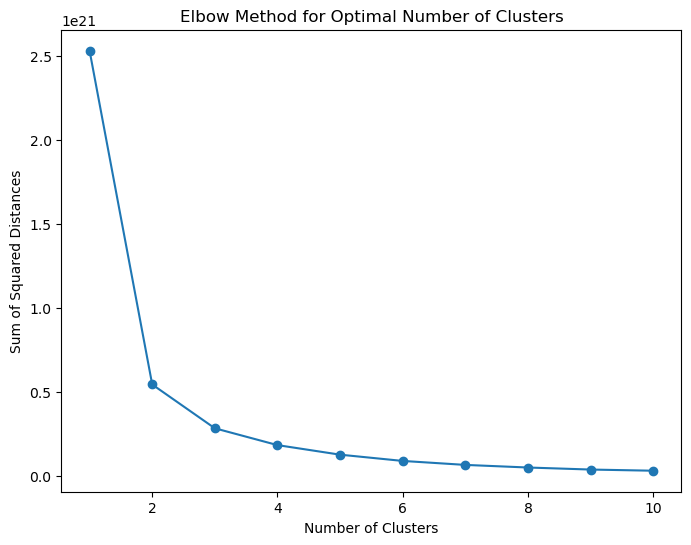

In [237]:
X = experience_metrics[['TCP_total', 'Avg_RTT_total','Avg_Bearer_total',]]

# Initialize an empty list to store the sum of squared distances
wcss = []

# Run K-means for a range of cluster numbers (e.g., from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

##### Interpretation & Conclusion

* The optimal number of clusters (k) appears to be 3, as that is where the curve starts to exhibit diminishing returns in terms of reducing the sum of squared distances.
* It suggests that the dataset can be effectively grouped into three distinct clusters based on the features TCP_total, Avg_RTT_total, and Avg_Bearer_total.
* The clustering with three groups is likely to capture meaningful patterns in the data without unnecessarily complicating the model.
* This insight can guide the selection of the appropriate number of clusters for subsequent analyses or applications, allowing for a balance between model complexity and explanatory power.


##### Silhouetter Score Method for K Mean Cluster 

In [198]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [235]:
# Assuming X contains the features for clustering
X = experience_metrics[['TCP_total', 'Avg_Bearer_total']]

In [ ]:
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Run K-means for a range of cluster numbers (e.g., from 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

kmeans

/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/j

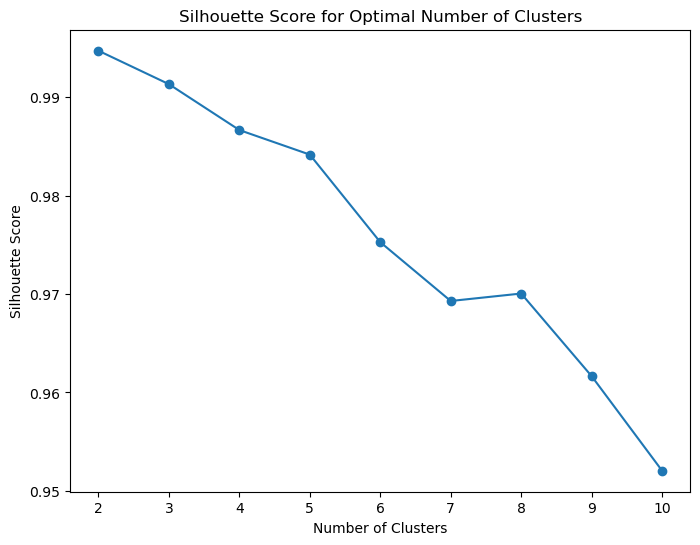

In [202]:
# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##### Interpretation 

* The Silhouette Score is used to evaluate the effectiveness of clustering, providing insight into the separation distance between the resulting clusters. Here's the interpretation based on the provided Silhouette Score curve:

* Peak at k=3: The silhouette scores reach their peak at k=3, indicating that the data points within the clusters are well-matched and have a good separation. This aligns with the Elbow Method's suggestion of having three clusters.

* Decrease after k=3: Beyond k=3, the silhouette scores start to decrease. This suggests that adding more clusters doesn't significantly improve the separation between clusters and may even lead to less meaningful cluster assignments.

##### Conclusion:

The Silhouette Score analysis supports the choice of k=3 as the optimal number of clusters.
It indicates that the data is well-suited for three clusters, as this configuration provides the highest silhouette scores and, therefore, the best-defined clusters.
Combining the insights from both the Elbow Method and the Silhouette Score helps to reinforce the conclusion that three clusters are appropriate for the given dataset. This information can guide the selection of the optimal number of clusters for subsequent analyses or applications.